<a href="https://colab.research.google.com/github/DavidEgas2004/Taller2/blob/main/MetodoNewton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Metodo de newton
##Nombre: David Egas
##Fecha: 09/11/2024

##Taller 2

In [62]:
def f(x):
    y = x**3 - 3 * x**2 + x - 1
    return y

In [63]:
from scipy.optimize import newton

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html
x0 = 100
x_r=newton(f, x0)
x_r

2.7692923542386314

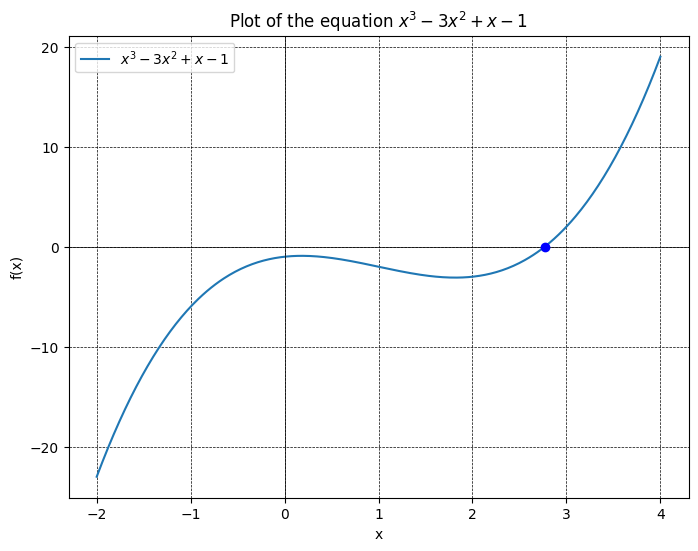

In [64]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-2, 4, 400)
# -2 límite inicial, 4 límite final incl., 400 número de puntos

y = f(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, label="$x^3 - 3x^2 + x - 1$")
plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
#Usando el metodo de newton graficamos dicho punto
plt.scatter(x_r, f(x_r), color="blue", zorder=5)
plt.grid(color="black", linestyle="--", linewidth=0.5)
plt.title("Plot of the equation $x^3 - 3x^2 + x - 1$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

Recuperacion de los valores a los que algoritmo visita tratando de llegar a la raiz.


In [65]:
def f1(x: float, points: list[float] = [], show: bool = False):
    y = x**3 - 3 * x**2 + x - 1
    points.append((x, y))
    if show:
        print(f"f({x}) = {y}")
    return y

In [66]:
from scipy.optimize import newton
x0 = 100
points = []
x_r = newton(f1, x0, args=(points, True), maxiter=100)  # Usando el metodo de la secante

f(100.0) = 970099.0
f(100.01010000000001) = 970395.9803980006
f(67.00792386980214) = 287465.54571529943
f(53.116335372259854) = 141447.59273483977
f(39.65955343460801) = 57699.74450824955
f(30.388236067683557) = 25320.914914632634
f(23.137873990336278) = 10803.174516522931
f(17.742617932460977) = 4657.725983130829
f(13.65347387896111) = 1998.6458316465025
f(10.579948354366646) = 858.043795817009
f(8.267818948297682) = 367.35922412035336
f(6.536804537670478) = 156.66380304361124
f(5.249698727272358) = 66.24990348675587
f(4.306584492248163) = 27.539375882553202
f(3.6356358117218313) = 11.037373198988304
f(3.1868714328556598) = 4.084765647739281
f(2.923215343365569) = 1.2670760212328207
f(2.804652849575538) = 0.26803700410227016
f(2.772843145360331) = 0.02631152581509344
f(2.7693806975473843) = 0.0006530032799583196
f(2.769292579076204) = 1.6618166540638413e-06
f(2.7692923542528955) = 1.0542855477524427e-10


Grafico de la trayectoria de los puntos:

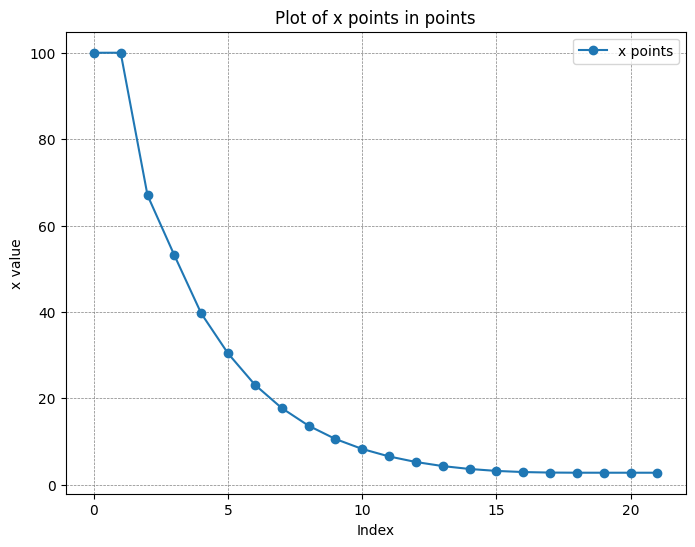

In [67]:
x_points = [point[0] for point in points]

# Plot the x points
plt.figure(figsize=(8, 6))
plt.plot(x_points, "o-", label="x points")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.title("Plot of x points in points")
plt.xlabel("Index")
plt.ylabel("x value")
plt.legend()
plt.show()

#Usando el metodo de Newton y sabiendo (obteniendo) la derivada de la funcion.  

In [78]:
from scipy.optimize import newton

def f2(x, puntos, show=False):
    y = x**3 - 3*x**2 + x - 1
    puntos.append(x)  # Guardamos el valor de x en cada iteración
    if show:
        print(f"f({x}) = {y}")
    return y

def derivada(x):
  #Derivada de la funcion de f1 para aplicar el metodo de newton
  return 3*x**2 - 6*x + 1

x0 = 100
puntos= []

# Llamada a la función newton con la derivada especificada
# Usamos una función lambda para pasar solo x a derivada y ambos argumentos a f1
raiz = newton(lambda x: f2(x, puntos), x0, fprime=derivada, maxiter=100)
raiz
#Observamos que el valor es el mismo que el obtenido con el metodo de la secante mediante el uso de la derivada

2.7692923542386314

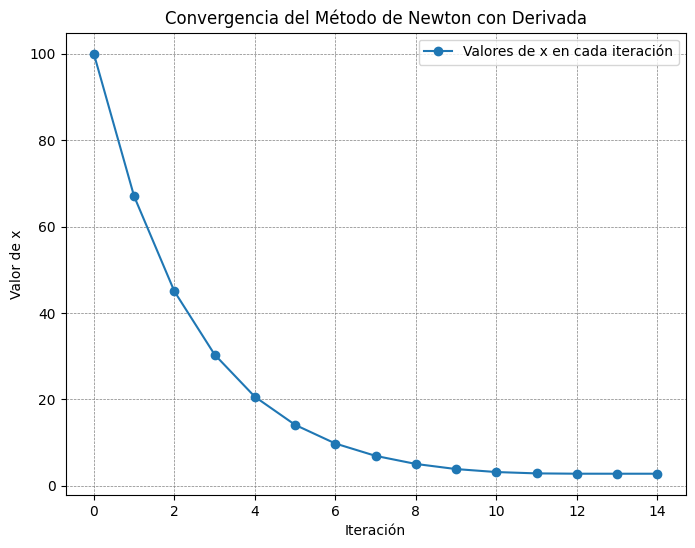

In [79]:
from scipy.optimize import newton
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(puntos, "o-", label="Valores de x en cada iteración")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.title("Convergencia del Método de Newton con Derivada")
plt.xlabel("Iteración")
plt.ylabel("Valor de x")
plt.legend()
plt.show()

#Con otras estimaciones y evitando errores  

In [87]:
from scipy.optimize import newton

x0 = -1 # estimacion nueva
points = []
x_r = newton(f1, x0, args=(points, True), maxiter=100)  # Este no es método de Newton, es secante!

f(-1.0) = -6.0
f(-1.0002) = -6.002000240008
f(-0.40007199376044494) = -1.944279357559926
f(-0.11251734714285737) = -1.1519222942429534
f(0.3055272738835656) = -0.9459934428847171
f(2.225935549440168) = -2.6093905298716624
f(-0.7866314478975496) = -4.129757466766417
f(7.396374081543759) = 246.90595135720395
f(-0.6520138337576513) = -3.2045654027231674
f(-0.5488930782005125) = -2.6181164009056803
f(-0.08852544084207464) = -1.1127294539448893
f(0.2517622378613702) = -0.9224326811942098
f(1.9012514609656634) = -3.0704576412075024
f(-0.4565827744142934) = -2.1771690842380034
f(-6.203218352555335) = -361.3423052459625
f(-0.42174810907673893) = -2.030379466687118
f(-0.3890785046817195) = -1.9021242675113228
f(0.09543711518477387) = -0.9310183492475942
f(0.5599517722463857) = -1.205115558242392
f(-1.4823668719657201) = -12.33197157683866
f(0.7811490240949828) = -1.5727800797435725
f(1.1120300863447232) = -2.2226541121759515
f(-0.019626383906773105) = -1.0207895287264157
f(-0.9807854785800442) 

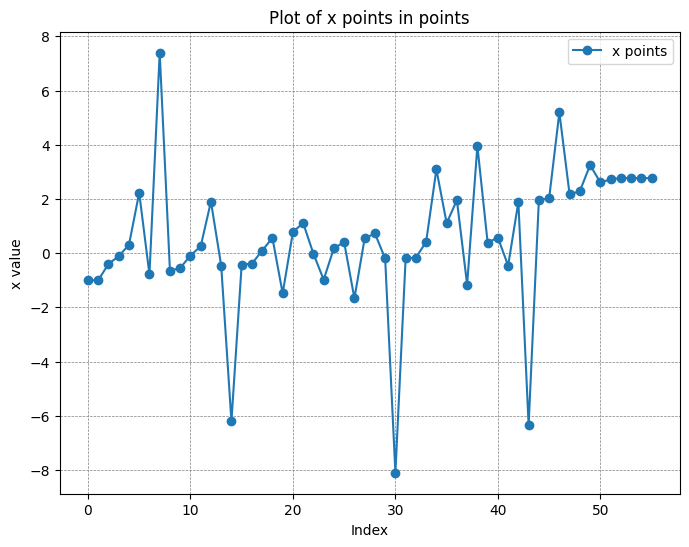

In [81]:

x_points = [point[0] for point in points]

# Plot the x points
plt.figure(figsize=(8, 6))
plt.plot(x_points, "o-", label="x points")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.title("Plot of x points in points")
plt.xlabel("Index")
plt.ylabel("x value")
plt.legend()
plt.show()

In [83]:
from scipy.optimize import newton

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html
x0 = -1
points = []
x_r, alg_info = newton(
    f1,
    x0,
    args=(points, False),
    maxiter=50,
    disp=False,  # No mostrar mensajes de error cuando no converge
    full_output=True,  # Return algorithm information
)  # Este no es método de Newton, es secante!

In [84]:
alg_info

      converged: False
           flag: convergence error
 function_calls: 52
     iterations: 50
           root: 2.7222958393643077
         method: secant

#Usando el metodo de newton

In [107]:
x0 = -1 # Valor inicial nuevo
p= []

# Llamada a la función newton con la derivada especificada
# Usamos una función lambda para pasar solo x a derivada y ambos argumentos a f1
raiz = newton(lambda x: f2(x, p), x0, fprime=derivada, maxiter=50)
raiz

2.7692923542386314

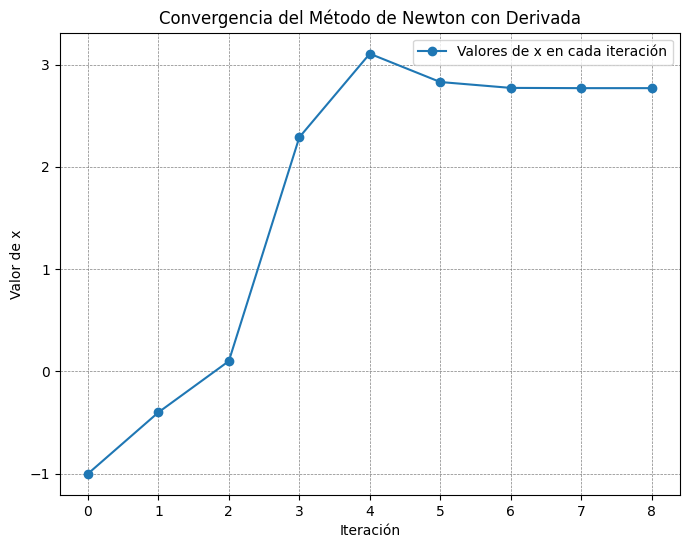

In [106]:
from scipy.optimize import newton
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(p, "o-", label="Valores de x en cada iteración")
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.title("Convergencia del Método de Newton con Derivada")
plt.xlabel("Iteración")
plt.ylabel("Valor de x")
plt.legend()
plt.show()

In [115]:
x0 = -1
p=[]
x_r =newton(lambda x: f2(x, p), x0, fprime=derivada, maxiter=100)
raiz, alg_info_nt = newton(
    lambda x: f2(x, p),
    x0,
    fprime=derivada,
    maxiter=50,
    disp=False,     # No mostrar mensajes de error si no converge
    full_output=True  # Para devolver la información del algoritmo
)

In [116]:
alg_info_nt

      converged: True
           flag: converged
 function_calls: 18
     iterations: 9
           root: 2.7692923542386314
         method: newton

Como podemos observar cuando el valor inicial es -1 el metodo de la secante analizando mediante el grafico podemos observar como se comporta el valor de x en cada una de las iteraciones, miesntras que usando el metodo de newton obteniendo la derivada de la funcion el numero de iteraciones se reduce considerablemente. Tambien esta funcion de scipy.optimize nos ayuda a tener un mejoir control de los errores sin el uso de excepciones y otras herramientas.
